In [1]:
import torch
dataset = torch.load(
        "results/preprocessed_data/downsampled_imgs.trch"
    )

def quantile(arr: torch.Tensor, q):
        arr = arr.flatten()

        l = len(arr)

        return torch.kthvalue(arr, int(q * l)).values

def process(img):
    img = img - quantile(img, .01)
    img = img / quantile(img, .99)
    return img

dataset = list(map(process, dataset))
dataset = torch.cat(dataset)


In [2]:
import cli

In [3]:
model = cli.get_model()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import icon_registration.itk_wrapper

In [6]:
atlas = torch.mean(dataset, axis=0, keepdims=True).cuda()

In [88]:
atlas.shape

torch.Size([1, 1, 105, 280, 135])

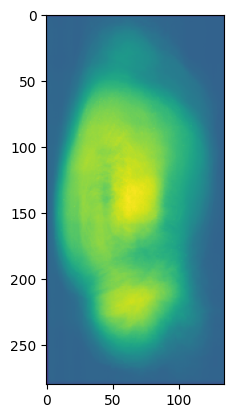

In [89]:
plt.imshow(atlas[0, 0, 50].cpu())

In [109]:
import tqdm
with torch.no_grad():
    disps = []
    warpeds = []
    for img in tqdm.tqdm(dataset[:]):
        img = img[None].cuda()
        model(img, atlas)
        warpeds.append(model.warped_image_A.cpu())
        model(atlas, img)
        disps.append(model.phi_AB_vectorfield.cpu())
    warpeds = torch.cat(warpeds)
    disps = torch.cat(disps)

100%|█████████████████████████████████████████| 108/108 [01:18<00:00,  1.38it/s]


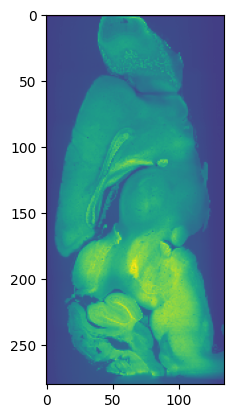

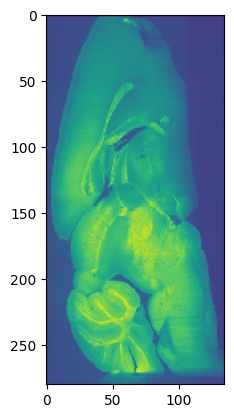

In [144]:
plt.imshow(dataset[0, 0, 90].cpu())
plt.show()
plt.imshow(dataset[1, 0, 90].cpu())

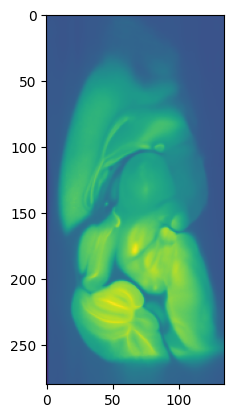

In [111]:
atlas = torch.mean(warpeds, axis=0, keepdims=True)
plt.imshow(atlas[0, 0, 93].cpu())

In [95]:
disps.shape

torch.Size([108, 3, 105, 280, 135])

In [113]:
fix = torch.mean(disps, axis=0, keepdims=True)

In [114]:
fix.shape

torch.Size([1, 3, 105, 280, 135])

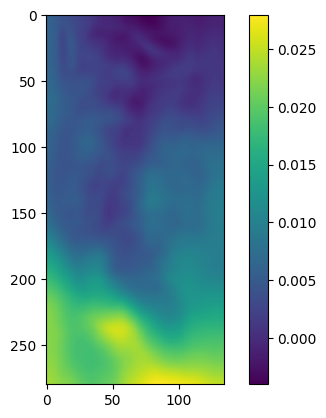

In [115]:
plt.imshow((fix - model.identity_map.cpu())[0, 0, 90].cpu())
plt.colorbar()

In [116]:
atlas = model.as_function(atlas)(fix)

In [117]:
atlas = atlas.cuda()

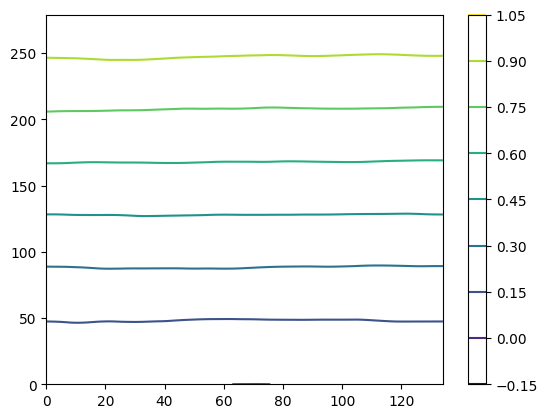

In [101]:
plt.contour((fix)[0, 1, 90].cpu())
plt.colorbar()

In [119]:
import tqdm

disps = []
warpeds = []
for img in tqdm.tqdm(dataset[:]):
    model = cli.get_model()
    img = img[None].cuda()
    icon_registration.itk_wrapper.finetune_execute(model, img, atlas, 10)
    warpeds.append(model.warped_image_A.cpu().detach())

warpeds = torch.cat(warpeds)
disps = torch.cat(disps)

  0%|                                                   | 0/108 [00:00<?, ?it/s]

BendingLoss(all_loss=tensor(0.2202, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0038, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2010, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(14., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2168, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0039, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1971, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(20., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2144, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0041, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1941, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

  1%|▍                                          | 1/108 [00:14<26:42, 14.98s/it]

BendingLoss(all_loss=tensor(0.2320, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0060, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2022, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2282, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0061, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1975, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2254, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0063, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1939, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

  2%|▊                                          | 2/108 [00:29<26:02, 14.74s/it]

BendingLoss(all_loss=tensor(0.2716, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0073, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2351, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2681, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0075, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2305, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2654, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0077, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2267, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

  3%|█▏                                         | 3/108 [00:44<25:45, 14.72s/it]

BendingLoss(all_loss=tensor(0.2243, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0046, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2011, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2206, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0048, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1968, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2178, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0049, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1935, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

  4%|█▌                                         | 4/108 [00:59<25:33, 14.75s/it]

BendingLoss(all_loss=tensor(0.3525, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0078, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3134, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3406, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0079, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3012, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3322, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0080, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2924, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

  5%|█▉                                         | 5/108 [01:13<25:22, 14.78s/it]

BendingLoss(all_loss=tensor(0.6505, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0162, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5696, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0108, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.6092, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0163, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5277, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0099, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.5820, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0165, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4996, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0091, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

  6%|██▍                                        | 6/108 [01:28<25:12, 14.83s/it]

BendingLoss(all_loss=tensor(0.4014, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3705, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0005, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3958, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0063, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3644, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3912, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3593, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

  6%|██▊                                        | 7/108 [01:43<25:00, 14.86s/it]

BendingLoss(all_loss=tensor(0.4063, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0053, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3796, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(28., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4011, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0054, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3739, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(35., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3974, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0056, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3695, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

  7%|███▏                                       | 8/108 [01:58<24:48, 14.89s/it]

BendingLoss(all_loss=tensor(0.4483, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0110, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3932, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0061, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(140., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4416, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0111, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3860, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0060, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(150., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4368, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0112, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3809, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0059, device='cuda:0', grad_fn=<MeanBackward0>), flips=te

  8%|███▌                                       | 9/108 [02:13<24:36, 14.92s/it]

BendingLoss(all_loss=tensor(0.2375, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0050, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2123, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2329, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0051, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2076, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2297, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0051, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2043, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

  9%|███▉                                      | 10/108 [02:28<24:23, 14.94s/it]

BendingLoss(all_loss=tensor(0.3834, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0058, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3546, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3777, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0060, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3479, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3732, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0061, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3425, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 10%|████▎                                     | 11/108 [02:43<24:09, 14.95s/it]

BendingLoss(all_loss=tensor(0.3997, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0050, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3748, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3941, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3682, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3896, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0054, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3627, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 11%|████▋                                     | 12/108 [02:58<23:56, 14.96s/it]

BendingLoss(all_loss=tensor(0.2215, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0044, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1996, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2181, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0045, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1959, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2158, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0045, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1931, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 12%|█████                                     | 13/108 [03:13<23:42, 14.97s/it]

BendingLoss(all_loss=tensor(0.2331, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0048, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2090, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2291, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0049, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2045, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2267, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0050, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2015, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 13%|█████▍                                    | 14/108 [03:28<23:27, 14.97s/it]

BendingLoss(all_loss=tensor(0.2758, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0063, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2445, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0005, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(36., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2720, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2398, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0005, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(42., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2691, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0066, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2360, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 14%|█████▊                                    | 15/108 [03:43<23:12, 14.97s/it]

BendingLoss(all_loss=tensor(0.3246, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0089, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2803, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(85., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3198, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0091, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2745, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(96., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3165, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0093, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2702, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 15%|██████▏                                   | 16/108 [03:58<22:58, 14.99s/it]

BendingLoss(all_loss=tensor(0.6669, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0107, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.6137, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.6200, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0107, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5664, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.5755, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0106, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5225, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 16%|██████▌                                   | 17/108 [04:13<22:44, 14.99s/it]

BendingLoss(all_loss=tensor(0.6689, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0162, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5879, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.6420, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0165, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5592, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.6161, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0168, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5321, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 17%|███████                                   | 18/108 [04:28<22:29, 15.00s/it]

BendingLoss(all_loss=tensor(0.2375, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0051, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2119, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(2., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2333, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2075, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(5., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2310, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2049, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 18%|███████▍                                  | 19/108 [04:43<22:14, 15.00s/it]

BendingLoss(all_loss=tensor(0.2534, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0056, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2253, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(4., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2485, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0058, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2196, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(2., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2450, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0059, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2154, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 19%|███████▊                                  | 20/108 [04:58<22:00, 15.01s/it]

BendingLoss(all_loss=tensor(0.3877, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0046, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3649, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3826, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0048, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3588, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3784, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0050, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3536, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 19%|████████▏                                 | 21/108 [05:13<21:45, 15.01s/it]

BendingLoss(all_loss=tensor(0.2344, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0048, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2104, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2303, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0050, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2055, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2276, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0051, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2020, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 20%|████████▌                                 | 22/108 [05:28<21:31, 15.01s/it]

BendingLoss(all_loss=tensor(0.3245, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0098, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2753, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0087, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3185, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0100, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2683, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0086, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(5., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3138, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0102, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2627, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0085, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 21%|████████▉                                 | 23/108 [05:43<21:16, 15.02s/it]

BendingLoss(all_loss=tensor(0.4571, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0082, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4164, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0011, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4127, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0078, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3739, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0011, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3884, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0075, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3512, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0011, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 22%|█████████▎                                | 24/108 [05:58<21:00, 15.01s/it]

BendingLoss(all_loss=tensor(0.4090, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0086, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3658, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3862, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0087, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3429, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3742, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0087, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3305, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 23%|█████████▋                                | 25/108 [06:13<20:46, 15.01s/it]

BendingLoss(all_loss=tensor(0.2667, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0047, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2432, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2624, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0047, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2388, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2590, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0048, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2351, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 24%|██████████                                | 26/108 [06:28<20:31, 15.01s/it]

BendingLoss(all_loss=tensor(0.6985, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0193, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.6019, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0034, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.6677, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0190, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5729, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0038, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.6383, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0186, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5454, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0041, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 25%|██████████▌                               | 27/108 [06:43<20:16, 15.02s/it]

BendingLoss(all_loss=tensor(0.3723, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0099, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3229, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0011, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(50., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3685, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0103, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3172, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0011, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(60., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3654, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0106, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3126, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0011, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 26%|██████████▉                               | 28/108 [06:58<20:02, 15.03s/it]

BendingLoss(all_loss=tensor(0.4330, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0101, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3825, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(48., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4286, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0104, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3768, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(56., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4243, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0106, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3713, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 27%|███████████▎                              | 29/108 [07:13<19:48, 15.04s/it]

BendingLoss(all_loss=tensor(0.3387, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0085, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2960, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0011, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(211., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3329, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0088, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2889, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0011, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(226., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3289, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0090, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2841, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0011, device='cuda:0', grad_fn=<MeanBackward0>), flips=te

 28%|███████████▋                              | 30/108 [07:28<19:33, 15.04s/it]

BendingLoss(all_loss=tensor(0.3035, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0111, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2482, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(41., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2956, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0112, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2398, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(47., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2902, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0113, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2338, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 29%|████████████                              | 31/108 [07:43<19:17, 15.03s/it]

BendingLoss(all_loss=tensor(0.2911, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0070, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2560, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(151., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2863, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0071, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2509, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(163., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2832, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0072, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2473, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>), flips=te

 30%|████████████▍                             | 32/108 [07:58<19:02, 15.04s/it]

BendingLoss(all_loss=tensor(0.3415, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0082, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3005, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3214, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0082, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2804, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3097, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0082, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2686, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 31%|████████████▊                             | 33/108 [08:14<18:48, 15.04s/it]

BendingLoss(all_loss=tensor(0.4126, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0129, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3480, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0079, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3754, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0128, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3114, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0085, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3528, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0127, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2894, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0089, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 31%|█████████████▏                            | 34/108 [08:29<18:33, 15.04s/it]

BendingLoss(all_loss=tensor(0.2205, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0049, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1961, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2168, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0051, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1915, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2141, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1880, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 32%|█████████████▌                            | 35/108 [08:44<18:18, 15.04s/it]

BendingLoss(all_loss=tensor(0.4121, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0076, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3740, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4074, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0077, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3690, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4035, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0077, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3649, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 33%|██████████████                            | 36/108 [08:59<18:03, 15.05s/it]

BendingLoss(all_loss=tensor(0.3982, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0081, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3579, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3896, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0082, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3487, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3841, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0084, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3424, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 34%|██████████████▍                           | 37/108 [09:14<17:47, 15.04s/it]

BendingLoss(all_loss=tensor(0.3608, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0055, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3331, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3545, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0056, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3264, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3501, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0057, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3214, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 35%|██████████████▊                           | 38/108 [09:29<17:31, 15.03s/it]

BendingLoss(all_loss=tensor(0.5773, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0126, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5144, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0024, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.5647, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0125, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5024, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0024, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.5552, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0124, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4933, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0024, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 36%|███████████████▏                          | 39/108 [09:44<17:16, 15.03s/it]

BendingLoss(all_loss=tensor(0.4406, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0087, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3970, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0026, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(34., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4361, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0089, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3915, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0026, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(39., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4328, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0092, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3869, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0026, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 37%|███████████████▌                          | 40/108 [09:59<17:01, 15.02s/it]

BendingLoss(all_loss=tensor(0.2532, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0058, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2241, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2481, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0061, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2174, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2448, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2127, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 38%|███████████████▉                          | 41/108 [10:14<16:46, 15.02s/it]

BendingLoss(all_loss=tensor(0.2312, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0050, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2063, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2272, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0050, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2023, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2241, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0050, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1992, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 39%|████████████████▎                         | 42/108 [10:29<16:31, 15.02s/it]

BendingLoss(all_loss=tensor(0.4763, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0088, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4323, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(23., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4694, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0089, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4249, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(22., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4641, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0090, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4190, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 40%|████████████████▋                         | 43/108 [10:44<16:16, 15.02s/it]

BendingLoss(all_loss=tensor(0.3661, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3401, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3607, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0054, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3334, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3560, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0056, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3278, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 41%|█████████████████                         | 44/108 [10:59<16:01, 15.02s/it]

BendingLoss(all_loss=tensor(0.3622, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0050, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3371, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3573, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0051, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3317, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3534, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3273, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 42%|█████████████████▌                        | 45/108 [11:14<15:46, 15.02s/it]

BendingLoss(all_loss=tensor(0.3681, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0068, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3340, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3629, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0069, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3286, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3591, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0069, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3245, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 43%|█████████████████▉                        | 46/108 [11:29<15:32, 15.04s/it]

BendingLoss(all_loss=tensor(0.2931, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0072, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2572, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2883, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0074, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2512, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2849, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0076, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2467, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 44%|██████████████████▎                       | 47/108 [11:44<15:18, 15.06s/it]

BendingLoss(all_loss=tensor(0.3952, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0048, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3710, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3894, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0051, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3641, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3847, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0053, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3583, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 44%|██████████████████▋                       | 48/108 [11:59<15:02, 15.05s/it]

BendingLoss(all_loss=tensor(0.4006, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0060, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3706, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3941, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3631, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3897, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3577, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 45%|███████████████████                       | 49/108 [12:14<14:47, 15.05s/it]

BendingLoss(all_loss=tensor(0.2175, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0041, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1968, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2134, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0041, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1927, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2106, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0042, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1898, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 46%|███████████████████▍                      | 50/108 [12:29<14:32, 15.04s/it]

BendingLoss(all_loss=tensor(0.4596, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0102, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4086, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0051, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(9., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4483, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0103, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3967, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0051, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(13., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4397, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0104, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3877, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0052, device='cuda:0', grad_fn=<MeanBackward0>), flips=tenso

 47%|███████████████████▊                      | 51/108 [12:44<14:18, 15.06s/it]

BendingLoss(all_loss=tensor(0.2182, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0034, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2013, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2136, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0034, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1964, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2110, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0035, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1933, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 48%|████████████████████▏                     | 52/108 [12:59<14:04, 15.08s/it]

BendingLoss(all_loss=tensor(0.2314, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0041, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2109, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0098, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(44., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2260, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0042, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2052, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0099, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(43., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2223, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0042, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2012, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0099, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 49%|████████████████████▌                     | 53/108 [13:14<13:48, 15.06s/it]

BendingLoss(all_loss=tensor(0.3598, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3338, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0005, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(18., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3551, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0053, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3287, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0005, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(21., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3514, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0053, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3247, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0005, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 50%|█████████████████████                     | 54/108 [13:29<13:32, 15.05s/it]

BendingLoss(all_loss=tensor(0.2235, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0046, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2007, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2197, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0047, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1960, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2172, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0049, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1927, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 51%|█████████████████████▍                    | 55/108 [13:44<13:17, 15.04s/it]

BendingLoss(all_loss=tensor(0.2160, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0032, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1997, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2129, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0034, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1960, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2106, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0035, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1930, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 52%|█████████████████████▊                    | 56/108 [13:59<13:02, 15.04s/it]

BendingLoss(all_loss=tensor(0.6262, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0163, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5447, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0092, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.5899, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0164, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5080, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0084, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.5567, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0165, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4743, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0077, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 53%|██████████████████████▏                   | 57/108 [14:15<12:47, 15.05s/it]

BendingLoss(all_loss=tensor(0.2359, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0050, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2109, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2321, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2060, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2295, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0054, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2026, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 54%|██████████████████████▌                   | 58/108 [14:30<12:32, 15.04s/it]

BendingLoss(all_loss=tensor(0.3665, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0075, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3289, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3584, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0078, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3196, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3516, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0079, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3120, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 55%|██████████████████████▉                   | 59/108 [14:45<12:16, 15.04s/it]

BendingLoss(all_loss=tensor(0.2284, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0044, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2064, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2250, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0046, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2022, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2220, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0047, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1985, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 56%|███████████████████████▎                  | 60/108 [15:00<12:02, 15.05s/it]

BendingLoss(all_loss=tensor(0.3653, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0055, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3376, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0037, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(77., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3597, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0057, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3311, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0036, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(86., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3562, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0058, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3270, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0036, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 56%|███████████████████████▋                  | 61/108 [15:15<11:47, 15.06s/it]

BendingLoss(all_loss=tensor(0.2567, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0054, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2295, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2508, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0056, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2230, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2473, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0057, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2190, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 57%|████████████████████████                  | 62/108 [15:30<11:32, 15.06s/it]

BendingLoss(all_loss=tensor(0.2212, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0034, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2042, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0003, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2175, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0035, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2002, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0003, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2150, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0035, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1974, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0003, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 58%|████████████████████████▌                 | 63/108 [15:45<11:17, 15.06s/it]

BendingLoss(all_loss=tensor(0.3078, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0061, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2772, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2970, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2659, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2900, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0063, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2587, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 59%|████████████████████████▉                 | 64/108 [16:00<11:02, 15.05s/it]

BendingLoss(all_loss=tensor(0.2496, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0048, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2255, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(3., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2456, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0050, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2208, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2429, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0051, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2173, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 60%|█████████████████████████▎                | 65/108 [16:15<10:47, 15.05s/it]

BendingLoss(all_loss=tensor(0.4222, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0071, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3867, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(77., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4165, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0072, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3805, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(76., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4124, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0073, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3758, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 61%|█████████████████████████▋                | 66/108 [16:30<10:31, 15.03s/it]

BendingLoss(all_loss=tensor(0.3903, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0072, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3545, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3841, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0073, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3475, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3790, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0074, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3417, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 62%|██████████████████████████                | 67/108 [16:45<10:15, 15.02s/it]

BendingLoss(all_loss=tensor(0.2231, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0039, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2037, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2191, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0039, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1996, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2162, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0040, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1964, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 63%|██████████████████████████▍               | 68/108 [17:00<10:00, 15.01s/it]

BendingLoss(all_loss=tensor(0.3759, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0059, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3462, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3706, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3397, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3670, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3350, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 64%|██████████████████████████▊               | 69/108 [17:15<09:45, 15.01s/it]

BendingLoss(all_loss=tensor(0.4159, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0060, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3862, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0007, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4127, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0061, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3821, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0007, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(5., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4084, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3771, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0007, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 65%|███████████████████████████▏              | 70/108 [17:30<09:30, 15.01s/it]

BendingLoss(all_loss=tensor(0.3160, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0061, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2857, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0005, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3071, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2759, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0005, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3009, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2689, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0005, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 66%|███████████████████████████▌              | 71/108 [17:45<09:15, 15.01s/it]

BendingLoss(all_loss=tensor(0.3083, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2775, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3028, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2708, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2987, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0066, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2657, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 67%|████████████████████████████              | 72/108 [18:00<09:00, 15.01s/it]

BendingLoss(all_loss=tensor(0.2314, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0045, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2087, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0002, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(5., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2284, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0047, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2050, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0002, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(6., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2262, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0048, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2021, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0002, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 68%|████████████████████████████▍             | 73/108 [18:15<08:45, 15.00s/it]

BendingLoss(all_loss=tensor(0.4100, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0049, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3854, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4050, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0051, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3794, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4010, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0053, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3744, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 69%|████████████████████████████▊             | 74/108 [18:30<08:29, 15.00s/it]

BendingLoss(all_loss=tensor(0.4954, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0106, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4422, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4473, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0105, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3950, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4127, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0103, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3611, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 69%|█████████████████████████████▏            | 75/108 [18:45<08:14, 15.00s/it]

BendingLoss(all_loss=tensor(0.3126, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0078, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2738, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(11., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3086, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0079, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2690, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(10., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3054, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0080, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2651, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 70%|█████████████████████████████▌            | 76/108 [19:00<07:59, 15.00s/it]

BendingLoss(all_loss=tensor(0.2252, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0043, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2039, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2216, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0044, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1996, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2190, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0045, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1964, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 71%|█████████████████████████████▉            | 77/108 [19:15<07:45, 15.00s/it]

BendingLoss(all_loss=tensor(0.2614, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0065, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2286, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(28., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2566, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0065, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2243, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(34., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2532, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2213, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 72%|██████████████████████████████▎           | 78/108 [19:30<07:30, 15.00s/it]

BendingLoss(all_loss=tensor(0.2108, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0041, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1902, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2077, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0041, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1870, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2055, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0042, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1845, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 73%|██████████████████████████████▋           | 79/108 [19:45<07:14, 15.00s/it]

BendingLoss(all_loss=tensor(0.5568, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0093, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5103, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4930, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0090, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4481, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4572, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0089, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4130, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 74%|███████████████████████████████           | 80/108 [20:00<06:59, 15.00s/it]

BendingLoss(all_loss=tensor(0.3935, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0055, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3661, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3875, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0057, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3593, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3832, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0058, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3540, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 75%|███████████████████████████████▌          | 81/108 [20:15<06:45, 15.01s/it]

BendingLoss(all_loss=tensor(0.3780, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0112, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3222, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0061, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3349, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0106, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2820, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0068, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3154, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0102, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2646, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0073, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 76%|███████████████████████████████▉          | 82/108 [20:30<06:30, 15.03s/it]

BendingLoss(all_loss=tensor(0.2411, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2103, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2377, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2058, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2353, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0065, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2028, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0009, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 77%|████████████████████████████████▎         | 83/108 [20:45<06:15, 15.01s/it]

BendingLoss(all_loss=tensor(0.3304, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0072, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2945, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3215, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0074, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2844, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3153, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0077, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2770, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 78%|████████████████████████████████▋         | 84/108 [21:00<06:00, 15.01s/it]

BendingLoss(all_loss=tensor(0.4257, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0060, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3959, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4192, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3883, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(4., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4143, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3823, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 79%|█████████████████████████████████         | 85/108 [21:15<05:45, 15.00s/it]

BendingLoss(all_loss=tensor(0.4346, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0070, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3994, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4296, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0073, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3932, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4257, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0075, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3881, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 80%|█████████████████████████████████▍        | 86/108 [21:30<05:30, 15.00s/it]

BendingLoss(all_loss=tensor(0.4259, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0072, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3898, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4205, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0074, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3834, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4161, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0076, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3779, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 81%|█████████████████████████████████▊        | 87/108 [21:45<05:15, 15.00s/it]

BendingLoss(all_loss=tensor(0.4270, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0082, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3861, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(43., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4207, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0083, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3791, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(46., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4162, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0085, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3738, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 81%|██████████████████████████████████▏       | 88/108 [22:00<05:00, 15.02s/it]

BendingLoss(all_loss=tensor(0.2380, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0055, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2104, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2342, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0056, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2063, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2314, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0056, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2033, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 82%|██████████████████████████████████▌       | 89/108 [22:15<04:45, 15.03s/it]

BendingLoss(all_loss=tensor(0.4282, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0083, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3865, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4176, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0084, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3755, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4101, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0085, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3676, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 83%|███████████████████████████████████       | 90/108 [22:30<04:30, 15.03s/it]

BendingLoss(all_loss=tensor(0.2252, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0040, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2054, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2199, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0040, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1999, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2162, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0041, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1959, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 84%|███████████████████████████████████▍      | 91/108 [22:45<04:15, 15.03s/it]

BendingLoss(all_loss=tensor(0.3464, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0099, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2967, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(4., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3384, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0101, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2880, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(6., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3328, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0102, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2818, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 85%|███████████████████████████████████▊      | 92/108 [23:00<04:00, 15.03s/it]

BendingLoss(all_loss=tensor(0.4209, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0077, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3822, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4149, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0079, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3754, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4101, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0080, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3699, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 86%|████████████████████████████████████▏     | 93/108 [23:15<03:45, 15.04s/it]

BendingLoss(all_loss=tensor(0.2467, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0055, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2192, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2427, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0056, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2144, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2397, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0058, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2107, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 87%|████████████████████████████████████▌     | 94/108 [23:30<03:30, 15.04s/it]

BendingLoss(all_loss=tensor(0.2920, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2662, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2872, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2613, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2831, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2568, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 88%|████████████████████████████████████▉     | 95/108 [23:45<03:15, 15.03s/it]

BendingLoss(all_loss=tensor(0.2327, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0043, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2113, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2298, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0044, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2080, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2273, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0044, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2051, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 89%|█████████████████████████████████████▎    | 96/108 [24:00<03:00, 15.02s/it]

BendingLoss(all_loss=tensor(0.2363, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0040, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2165, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2326, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0041, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2122, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2300, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0042, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2090, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 90%|█████████████████████████████████████▋    | 97/108 [24:15<02:45, 15.01s/it]

BendingLoss(all_loss=tensor(0.3038, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0063, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2723, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2945, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2624, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2889, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0065, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2562, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 91%|██████████████████████████████████████    | 98/108 [24:30<02:30, 15.01s/it]

BendingLoss(all_loss=tensor(0.4299, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0077, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3913, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(22., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4254, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0079, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3859, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(22., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4213, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0081, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3806, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 92%|██████████████████████████████████████▌   | 99/108 [24:45<02:15, 15.02s/it]

BendingLoss(all_loss=tensor(0.3600, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0060, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3301, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0003, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(64., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3534, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0061, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3231, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0003, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(78., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3492, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0061, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3187, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0003, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 93%|█████████████████████████████████████▉   | 100/108 [25:00<02:00, 15.02s/it]

BendingLoss(all_loss=tensor(0.3333, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0053, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3070, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(12., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3223, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0053, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2958, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(15., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3189, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0053, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2922, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 94%|██████████████████████████████████████▎  | 101/108 [25:15<01:45, 15.01s/it]

BendingLoss(all_loss=tensor(0.3619, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0058, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3329, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3558, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0059, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3262, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.3516, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0061, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3213, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 94%|██████████████████████████████████████▋  | 102/108 [25:30<01:30, 15.01s/it]

BendingLoss(all_loss=tensor(0.2350, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0044, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2129, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(23., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2316, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0045, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2090, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(21., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2290, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0046, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2059, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 95%|███████████████████████████████████████  | 103/108 [25:45<01:15, 15.02s/it]

BendingLoss(all_loss=tensor(0.2187, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0035, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2012, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0003, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2145, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0036, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1965, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0003, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2117, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0037, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1932, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0003, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

 96%|███████████████████████████████████████▍ | 104/108 [26:00<01:00, 15.02s/it]

BendingLoss(all_loss=tensor(0.2741, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0063, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2428, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(25., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2698, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2386, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(31., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2665, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2353, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 97%|███████████████████████████████████████▊ | 105/108 [26:15<00:45, 15.02s/it]

BendingLoss(all_loss=tensor(0.2206, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0036, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.2025, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0002, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(15., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2165, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0037, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1979, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0002, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(18., device='cuda:0'))
BendingLoss(all_loss=tensor(0.2139, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0038, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.1948, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0002, device='cuda:0', grad_fn=<MeanBackward0>), flips=tens

 98%|████████████████████████████████████████▏| 106/108 [26:31<00:30, 15.03s/it]

BendingLoss(all_loss=tensor(0.4604, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0111, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4050, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0028, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(301., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4564, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0114, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3993, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0029, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(322., device='cuda:0'))
BendingLoss(all_loss=tensor(0.4525, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0116, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.3946, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0029, device='cuda:0', grad_fn=<MeanBackward0>), flips=te

 99%|████████████████████████████████████████▌| 107/108 [26:46<00:15, 15.03s/it]

BendingLoss(all_loss=tensor(0.6550, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0153, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5785, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0099, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(0., device='cuda:0'))
BendingLoss(all_loss=tensor(0.6005, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0152, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.5244, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0101, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor(1., device='cuda:0'))
BendingLoss(all_loss=tensor(0.5555, device='cuda:0', grad_fn=<AddBackward0>), bending_energy_loss=tensor(0.0151, device='cuda:0', grad_fn=<AddBackward0>), similarity_loss=tensor(0.4801, device='cuda:0', grad_fn=<MulBackward0>), transform_magnitude=tensor(0.0104, device='cuda:0', grad_fn=<MeanBackward0>), flips=tensor

100%|█████████████████████████████████████████| 108/108 [27:01<00:00, 15.01s/it]


RuntimeError: torch.cat(): expected a non-empty list of Tensors

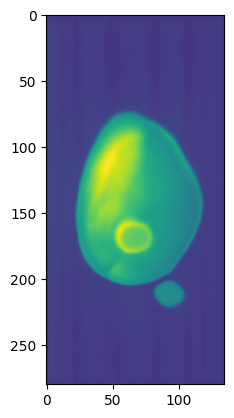

In [85]:
atlas = torch.mean(warpeds, axis=0, keepdims=True)
plt.imshow(atlas[0, 0, 20].cpu())

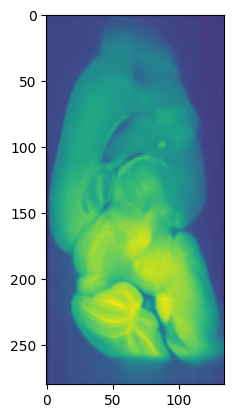

In [138]:
atlas = torch.median(warpeds, axis=0, keepdims=True)[0]
plt.imshow(atlas[0, 0, 104].cpu())

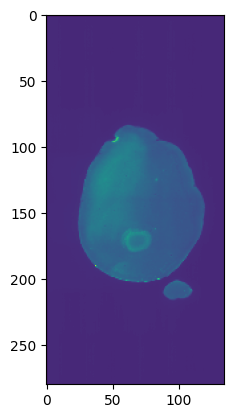

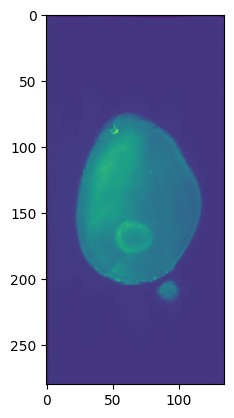

In [128]:
plt.imshow(dataset[14, 0, 20].cpu())
plt.show()
plt.imshow(warpeds[14, 0, 20].cpu())

In [154]:
torch.save(atlas, "atlas2.trch")

In [145]:
torch.export

AttributeError: module 'torch' has no attribute 'export'

In [147]:
traced_module = torch.jit.trace(model, (atlas.cuda(), atlas.cuda()))

torch.Tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
torch.Tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
torch.Tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
torch.Tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create ten

In [148]:
traced_module.save("traced_model.pt")

In [149]:
torch.jit.trace?

In [17]:
import footsteps
import itk

with torch.no_grad():
    atlas = torch.load("atlas2.trch")
    img = dataset[1:2]

    aspect="equal"
    
    name = "mouse"

    net = model

    image_A = img.cuda()
    image_B = atlas.cuda()

    net.prepare_for_viz(image_A, image_B)

    def savefig(name):
        import footsteps
        import os
        plt.savefig(name + ".png", bbox_inches="tight", pad_inches = 0)
        plt.close()

    def show(im, **kwargs):
        plt.imshow(im.cpu(), cmap="gray", aspect=aspect)
        plt.xticks([])
        plt.yticks([])

    composition = net.phi_BA(net.phi_AB_vectorfield)

    


    name = footsteps.output_dir + name

    warped_image_A = net.warped_image_A
    viewname = "Plane1"
    show(image_A[0, 0, 100])
    savefig(name + viewname + "image_A")
    plt.contour(net.phi_AB_vectorfield.detach().cpu()[0, 1, 50], levels=np.linspace(0, 1, 30))
    plt.contour(net.phi_AB_vectorfield.detach().cpu()[0, 2, 50], levels=np.linspace(0, 1, 30))
    show(warped_image_A[0, 0, 100])
    savefig(name + viewname + "warped_image_A_grid")
    plt.contour(composition.detach().cpu()[0, 1, 50], levels=np.linspace(0, 1, 30))
    plt.contour(composition.detach().cpu()[0, 2, 50], levels=np.linspace(0, 1, 30))
    show(warped_image_A[0, 0, 100] * 0)
    savefig(name + viewname + "composition")

    show(warped_image_A[0, 0, 100])
    savefig(name + viewname + "warped_image_A")

    show(image_B[0, 0, 100])
    savefig(name + viewname + "image_B")

    if "OAI" in name:
        aspect = 2

    viewname = "Plane2"
    show(image_A[0, 0, :, 100])
    savefig(name + viewname + "image_A")

    plt.contour(net.phi_AB_vectorfield.detach().cpu()[0, 0, :, 50], levels=np.linspace(0, 1, 30))
    plt.contour(net.phi_AB_vectorfield.detach().cpu()[0, 2, :, 50], levels=np.linspace(0, 1, 30))
    show(warped_image_A[0, 0, :, 100, :])
    savefig(name + viewname + "warped_image_A_grid")
    plt.contour(composition.detach().cpu()[0, 0, :, 50], levels=np.linspace(0, 1, 30))
    plt.contour(composition.detach().cpu()[0, 2, :, 50], levels=np.linspace(0, 1, 30))
    show(warped_image_A[0, 0, :, 100, :] * 0)
    savefig(name + viewname + "composition")

    show(warped_image_A[0, 0, :, 100])
    savefig(name + viewname + "warped_image_A")

    show(image_B[0, 0, :, 100])
    savefig(name + viewname + "image_B")


    viewname = "Plane3"
    show(image_A[0, 0, :, :, 100])
    savefig(name + viewname + "image_A")

    plt.contour(net.phi_AB_vectorfield.detach().cpu()[0, 0, :, :, 50], levels=np.linspace(0, 1, 30))
    plt.contour(net.phi_AB_vectorfield.detach().cpu()[0, 1, :, :, 50], levels=np.linspace(0, 1, 30))
    show(warped_image_A[0, 0, :, :, 100])
    savefig(name + viewname + "warped_image_A_grid")

    plt.contour(composition.detach().cpu()[0, 0, :, :, 50], levels=np.linspace(0, 1, 30))
    plt.contour(composition.detach().cpu()[0, 1, :, :, 50], levels=np.linspace(0, 1, 30))
    show(warped_image_A[0, 0, :, :, 100]*0)
    savefig(name + viewname + "composition")
    show(warped_image_A[0, 0, :, :, 100])
    savefig(name + viewname + "warped_image_A")

    show(image_B[0, 0, :, :, 100])
    savefig(name + viewname + "image_B")

In [11]:
!ntop

Mon Apr  1 13:57:26 2024
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Quadro RTX 6000                On  | 00000000:17:00.0 Off |                  Off |
| 34%   42C    P2              61W / 260W |  24192MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+---------